# Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
pd.set_option('display.max_columns', None)

## Explore our dataset

In [2]:
df = pd.read_csv("dataset\CSF_Proteomics_ADNI.csv")

#replace categorical feature with index labeling
df['binary_class'].replace({'stable':0,'decliner':1},inplace=True)
df['three_class'].replace({'slowDecline':0,'rapidDecline':1,'stable':2},inplace=True)

#differentiate other categorical features from the numerical ones
pheno = df.loc[:,'RID':'VISCODE']
data = df.loc[:,'A1AT.AVLTIDEK':'VTDB.VPTADLEDVLPLAEDITNILSK']

#check head of numerical sub-dataset
data.head()

,A1AT.AVLTIDEK,A1AT.LSITGTYDLK,A1AT.SVLGQLGITK,A1BG.NGVAQEPVHLDSPAIK,A1BG.SGLSTGWTQLSK,A2GL.DLLLPQPDLR,A2GL.VAAGAFQGLR,A4.LVFFAEDVGSNK,A4.THPHFVIPYR,A4.WYFDVTEGK,AACT.ADLSGITGAR,AACT.EIGELYLPK,AACT.NLAVSQVVHK,AATC.IVASTLSNPELFEEWTGNVK,AATC.LALGDDSPALK,AATC.NLDYVATSIHEAVTK,AATM.FVTVQTISGTGALR,AFAM.DADPDTFFAK,AFAM.FLVNLVK,AFAM.LPNNVLQEK,ALDOA.ALQASALK,ALDOA.QLLLTADDR,AMBP.AFIQLWAFDAVK,AMBP.ETLLQDFR,AMBP.FLYHK,AMD.IPVDEEAFVIDFKPR,AMD.IVQFSPSGK,AMD.NGQWTLIGR,APLP2.HYQHVLAVDPEK,APLP2.WYFDLSK,APOB.IAELSATAQEIIK,APOB.SVSLPSLDPASAK,APOB.TGISPLALIK,APOD.VLNQELR,APOE.AATVGSLAGQPLQER,APOE.CLAVYQAGAR,APOE.LAVYQAGAR,APOE.LGADMEDVR,APOE.LGPLVEQGR,B2MG.VEHSDLSFSK,B2MG.VNHVTLSQPK,B3GN1.EPGEFALLR,B3GN1.TALASGGVLDASGDYR,B3GN1.YEAAVPDPR,BACE1.SIVDSGTTNLR,BASP1.ETPAATEAPSSTPK,BTD.LSSGLVTAALYGR,BTD.SHLIIAQVAK,C1QB.LEQGENVFLQATDK,C1QB.VPGLYYFTYHASSR,CA2D1.FVVTDGGITR,CA2D1.IKPVFIEDANFGR,CA2D1.TASGVNQLVDIYEK,CAD13.DIQGSLQDIFK,CAD13.INENTGSVSVTR,CAD13.YEVSSPYFK,CADM3.EGSVPPLK,CADM3.GNPVPQQYLWEK,CADM3.SLVTVLGIPQKPIITGYK,CAH1.VLDALQAIK,CAH1.YSSLAEAASK,CATA.LFAYPDTHR,CATD.LVDQNIFSFYLSR,CATD.VSTLPAITLK,CATD.YSQAVPAVTEGPIPEVLK,CATL1.VFQEPLFYEAPR,CCKN.AHLGALLAR,CCKN.NLQNLDPSHR,CD14.AFPALTSLDLSDNPGLGER,CD14.FPAIQNLALR,CD14.SWLAELQQWLKPGLK,CD59.AGLQVYNK,CERU.IYHSHIDAPK,CERU.NNEGTYYSPNYNPQSR,CFAB.DAQYAPGYDK,CFAB.VSEADSSNADWVTK,CFAB.YGLVTYATYPK,CH3L1.ILGQQVPYATK,CH3L1.SFTLASSETGVGAPISGPGIPGR,CH3L1.VTIDSSYDIAK,CLUS.IDSLLENDR,CLUS.SGSGLVGR,CLUS.VTTVASHTSDSDVPSGVTEVVVK,CMGA.EDSLEAGLPLQVR,CMGA.SEALAVDGAGKPGAEEAQDPEGK,CMGA.SGEATDGARPQALPEPMQESK,CMGA.SGELEQEEER,CMGA.YPGPQAEGDSEGLSQGLVDR,CNDP1.ALEQDLPVNIK,CNDP1.VFQYIDLHQDEFVQTLK,CNDP1.WNYIEGTK,CNTN1.DGEYVVEVR,CNTN1.TTKPYPADIVVQFK,CNTN2.IIVQAQPEWLK,CNTN2.TTGPGGDGIPAEVHIVR,CNTN2.VIASNILGTGEPSGPSSK,CNTP2.HELQHPIIAR,CNTP2.VDNAPDQQNSHPDLAQEEIR,CNTP2.YSSSDWVTQYR,CO2.DFHINLFR,CO2.HAIILLTDGK,CO2.SSGQWQTPGATR,CO3.IHWESASLLR,CO3.LSINTHPSQKPLSITVR,CO3.TELRPGETLNVNFLLR,CO3.TGLQEVEVK,CO3.VPVAVQGEDTVQSLTQGDGVAK,CO4A.DHAVDLIQK,CO4A.GSFEFPVGDAVSK,CO4A.LGQYASPTAK,CO4A.NVNFQK,CO4A.VLSLAQEQVGGSPEK,CO4A.VTASDPLDTLGSEGALSPGGVASLLR,CO5.DINYVNPVIK,CO5.TLLPVSKPEIR,CO5.VFQFLEK,CO6.ALNHLPLEYNSALYSR,CO6.SEYGAALAWEK,CO8B.IPGIFELGISSQSDR,CO8B.SDLEVAHYK,CO8B.YEFILK,COCH.GVISNSGGPVR,CRP.ESDTSYVSLK,CSTN1.GNLAGLTLR,CSTN1.IHGQNVPFDAVVVDK,CSTN1.IPDGVVSVSPK,CSTN3.ATGEGLIR,CSTN3.ESLLLDTTSLQQR,CUTA.TQSSLVPALTDFVR,CYTC.ALDFAVGEYNK,DAG1.GVHYISVSATR,DAG1.LVPVVNNR,DAG1.VTIPTDLIASSGDIIK,DIAC.ATYIQNYR,ENOG.GNPTVEVDLYTAK,ENOG.LGAEVYHTLK,ENPP2.SYPEILTLK,ENPP2.WWGGQPLWITATK,EXTL2.VIVVWNNIGEK,FABPH.SIVTLDGGK,FABPH.SLGVGFATR,FAM3C.GINVALANGK,FAM3C.SALDTAAR,FAM3C.SPFEQHIK,FAM3C.TGEVLDTK,FBLN1.AITPPHPASQANIIFDITEGNLR,FBLN1.IIEVEEEQEDPYLNDR,FBLN1.TGYYFDGISR,FBLN3.IPSNPSHR,FBLN3.LTIIVGPFSF,FBLN3.SGNENGEFYLR,FETUA.AHYDLR,FETUA.FSVVYAK,FETUA.HTLNQIDEVK,FMOD.YLPFVPSR,GFAP.ALAAELNQLR,GOLM1.DQLVIPDGQEEEQEAAGEGR,GOLM1.QQLQALSEPQPR,GRIA4.EYPGSETPPK,GRIA4.LQNILEQIVSVGK,GRIA4.NTDQEYTAFR,HBA.FLASVSTVLTSK,HBA.TYFPHFDLSHGSAQVK,HBA.VGAHAGEYGAEALER,HBB.EFTPPVQAAYQK,HBB.SAVTALWGK,HBB.VNVDEVGGEALGR,HEMO.NFPSPVDAAFR,HEMO.QGHNSVFLIK,HEMO.SGAQATWTELPWPHEK,I18BP.LWEGSTSR,IBP2.HGLYNLK,IBP2.LIQGAPTIR,IGSF8.DTQFSYAVFK,IGSF8.LQGDAVVLK,IGSF8.VVAGEVQVQR,ITIH1.EVAFDLEIPK,ITIH1.QYYEGSEIVVAGR,ITIH5.SYLEITPSR,KAIN.FYYLIASETPGK,KAIN.LGFTDLFSK,KAIN.VGSALFLSHNLK,KAIN.WADLSGITK,KLK10.ALQLPYR,KLK11.LPHTLR,KLK6.ESSQEQSSVVR,KLK6.LSELIQPLPLER,KLK6.YTNWIQK,KNG1.DIPTNSPELEETLTHTITK,KNG1.QVVAGLNFR,KNG1.TVGSDTFYSFK,KPYM.LDIDSPPITAR,L1CAM.AQLLVVGSPGPVPR,L1CAM.LVLSDLHLLTQSQVR,L1CAM.WRPVDLAQVK,LAMB2.AQGIAQGAIR,LPHN1.LVVSQLNPYTLR,LPHN1.SGETVINTANYHDTSPYR,LRC4B.HLEILQLSK,LRC4B.LTTVPTQAFEYLSK,LTBP2.EQDAPVAGLQPVER,MIME.ESAYLYAR,MIME.ETVIIPNEK,MIME.LEGNPIVLGK,MOG.VVHLYR,MUC18.EVTVPVFYPTEK,MUC18.GATLALTQVTPQDER,NBL1.LALFPDK,NCAM1.AGEQDATIHLK,NCAM1.GLGEISAASEFK,NCAM2.ASGSPEPAISWFR,NCAM2.IIELSQTTAK,NCAN.APVLELEK,NCAN.LSSAIIAAPR,NEGR1.SSIIFAGGDK,NEGR1.VVVNFAPTIQEIK,NEGR1.WSVDPR,NELL2.AFLFQDTPR,NELL2.FTGSSWIK,NELL2.SALAYVDGK,NEO1.DVVASLVSTR,NEUS.ALGITEIFIK,NEUS.QEVPLATLEPLVK,NGF.SAPAAAIAAR,NICA.ALADVATVLGR,NICA.APDVTTLPR,NP

In [3]:
#check dataset statistics
data.describe()

,A1AT.AVLTIDEK,A1AT.LSITGTYDLK,A1AT.SVLGQLGITK,A1BG.NGVAQEPVHLDSPAIK,A1BG.SGLSTGWTQLSK,A2GL.DLLLPQPDLR,A2GL.VAAGAFQGLR,A4.LVFFAEDVGSNK,A4.THPHFVIPYR,A4.WYFDVTEGK,AACT.ADLSGITGAR,AACT.EIGELYLPK,AACT.NLAVSQVVHK,AATC.IVASTLSNPELFEEWTGNVK,AATC.LALGDDSPALK,AATC.NLDYVATSIHEAVTK,AATM.FVTVQTISGTGALR,AFAM.DADPDTFFAK,AFAM.FLVNLVK,AFAM.LPNNVLQEK,ALDOA.ALQASALK,ALDOA.QLLLTADDR,AMBP.AFIQLWAFDAVK,AMBP.ETLLQDFR,AMBP.FLYHK,AMD.IPVDEEAFVIDFKPR,AMD.IVQFSPSGK,AMD.NGQWTLIGR,APLP2.HYQHVLAVDPEK,APLP2.WYFDLSK,APOB.IAELSATAQEIIK,APOB.SVSLPSLDPASAK,APOB.TGISPLALIK,APOD.VLNQELR,APOE.AATVGSLAGQPLQER,APOE.CLAVYQAGAR,APOE.LAVYQAGAR,APOE.LGADMEDVR,APOE.LGPLVEQGR,B2MG.VEHSDLSFSK,B2MG.VNHVTLSQPK,B3GN1.EPGEFALLR,B3GN1.TALASGGVLDASGDYR,B3GN1.YEAAVPDPR,BACE1.SIVDSGTTNLR,BASP1.ETPAATEAPSSTPK,BTD.LSSGLVTAALYGR,BTD.SHLIIAQVAK,C1QB.LEQGENVFLQATDK,C1QB.VPGLYYFTYHASSR,CA2D1.FVVTDGGITR,CA2D1.IKPVFIEDANFGR,CA2D1.TASGVNQLVDIYEK,CAD13.DIQGSLQDIFK,CAD13.INENTGSVSVTR,CAD13.YEVSSPYFK,CADM3.EGSVPPLK,CADM3.GNPVPQQYLWEK,CADM3.SLVTVLGIPQKPIITGYK,CAH1.VLDALQAIK,CAH1.YSSLAEAASK,CATA.LFAYPDTHR,CATD.LVDQNIFSFYLSR,CATD.VSTLPAITLK,CATD.YSQAVPAVTEGPIPEVLK,CATL1.VFQEPLFYEAPR,CCKN.AHLGALLAR,CCKN.NLQNLDPSHR,CD14.AFPALTSLDLSDNPGLGER,CD14.FPAIQNLALR,CD14.SWLAELQQWLKPGLK,CD59.AGLQVYNK,CERU.IYHSHIDAPK,CERU.NNEGTYYSPNYNPQSR,CFAB.DAQYAPGYDK,CFAB.VSEADSSNADWVTK,CFAB.YGLVTYATYPK,CH3L1.ILGQQVPYATK,CH3L1.SFTLASSETGVGAPISGPGIPGR,CH3L1.VTIDSSYDIAK,CLUS.IDSLLENDR,CLUS.SGSGLVGR,CLUS.VTTVASHTSDSDVPSGVTEVVVK,CMGA.EDSLEAGLPLQVR,CMGA.SEALAVDGAGKPGAEEAQDPEGK,CMGA.SGEATDGARPQALPEPMQESK,CMGA.SGELEQEEER,CMGA.YPGPQAEGDSEGLSQGLVDR,CNDP1.ALEQDLPVNIK,CNDP1.VFQYIDLHQDEFVQTLK,CNDP1.WNYIEGTK,CNTN1.DGEYVVEVR,CNTN1.TTKPYPADIVVQFK,CNTN2.IIVQAQPEWLK,CNTN2.TTGPGGDGIPAEVHIVR,CNTN2.VIASNILGTGEPSGPSSK,CNTP2.HELQHPIIAR,CNTP2.VDNAPDQQNSHPDLAQEEIR,CNTP2.YSSSDWVTQYR,CO2.DFHINLFR,CO2.HAIILLTDGK,CO2.SSGQWQTPGATR,CO3.IHWESASLLR,CO3.LSINTHPSQKPLSITVR,CO3.TELRPGETLNVNFLLR,CO3.TGLQEVEVK,CO3.VPVAVQGEDTVQSLTQGDGVAK,CO4A.DHAVDLIQK,CO4A.GSFEFPVGDAVSK,CO4A.LGQYASPTAK,CO4A.NVNFQK,CO4A.VLSLAQEQVGGSPEK,CO4A.VTASDPLDTLGSEGALSPGGVASLLR,CO5.DINYVNPVIK,CO5.TLLPVSKPEIR,CO5.VFQFLEK,CO6.ALNHLPLEYNSALYSR,CO6.SEYGAALAWEK,CO8B.IPGIFELGISSQSDR,CO8B.SDLEVAHYK,CO8B.YEFILK,COCH.GVISNSGGPVR,CRP.ESDTSYVSLK,CSTN1.GNLAGLTLR,CSTN1.IHGQNVPFDAVVVDK,CSTN1.IPDGVVSVSPK,CSTN3.ATGEGLIR,CSTN3.ESLLLDTTSLQQR,CUTA.TQSSLVPALTDFVR,CYTC.ALDFAVGEYNK,DAG1.GVHYISVSATR,DAG1.LVPVVNNR,DAG1.VTIPTDLIASSGDIIK,DIAC.ATYIQNYR,ENOG.GNPTVEVDLYTAK,ENOG.LGAEVYHTLK,ENPP2.SYPEILTLK,ENPP2.WWGGQPLWITATK,EXTL2.VIVVWNNIGEK,FABPH.SIVTLDGGK,FABPH.SLGVGFATR,FAM3C.GINVALANGK,FAM3C.SALDTAAR,FAM3C.SPFEQHIK,FAM3C.TGEVLDTK,FBLN1.AITPPHPASQANIIFDITEGNLR,FBLN1.IIEVEEEQEDPYLNDR,FBLN1.TGYYFDGISR,FBLN3.IPSNPSHR,FBLN3.LTIIVGPFSF,FBLN3.SGNENGEFYLR,FETUA.AHYDLR,FETUA.FSVVYAK,FETUA.HTLNQIDEVK,FMOD.YLPFVPSR,GFAP.ALAAELNQLR,GOLM1.DQLVIPDGQEEEQEAAGEGR,GOLM1.QQLQALSEPQPR,GRIA4.EYPGSETPPK,GRIA4.LQNILEQIVSVGK,GRIA4.NTDQEYTAFR,HBA.FLASVSTVLTSK,HBA.TYFPHFDLSHGSAQVK,HBA.VGAHAGEYGAEALER,HBB.EFTPPVQAAYQK,HBB.SAVTALWGK,HBB.VNVDEVGGEALGR,HEMO.NFPSPVDAAFR,HEMO.QGHNSVFLIK,HEMO.SGAQATWTELPWPHEK,I18BP.LWEGSTSR,IBP2.HGLYNLK,IBP2.LIQGAPTIR,IGSF8.DTQFSYAVFK,IGSF8.LQGDAVVLK,IGSF8.VVAGEVQVQR,ITIH1.EVAFDLEIPK,ITIH1.QYYEGSEIVVAGR,ITIH5.SYLEITPSR,KAIN.FYYLIASETPGK,KAIN.LGFTDLFSK,KAIN.VGSALFLSHNLK,KAIN.WADLSGITK,KLK10.ALQLPYR,KLK11.LPHTLR,KLK6.ESSQEQSSVVR,KLK6.LSELIQPLPLER,KLK6.YTNWIQK,KNG1.DIPTNSPELEETLTHTITK,KNG1.QVVAGLNFR,KNG1.TVGSDTFYSFK,KPYM.LDIDSPPITAR,L1CAM.AQLLVVGSPGPVPR,L1CAM.LVLSDLHLLTQSQVR,L1CAM.WRPVDLAQVK,LAMB2.AQGIAQGAIR,LPHN1.LVVSQLNPYTLR,LPHN1.SGETVINTANYHDTSPYR,LRC4B.HLEILQLSK,LRC4B.LTTVPTQAFEYLSK,LTBP2.EQDAPVAGLQPVER,MIME.ESAYLYAR,MIME.ETVIIPNEK,MIME.LEGNPIVLGK,MOG.VVHLYR,MUC18.EVTVPVFYPTEK,MUC18.GATLALTQVTPQDER,NBL1.LALFPDK,NCAM1.AGEQDATIHLK,NCAM1.GLGEISAASEFK,NCAM2.ASGSPEPAISWFR,NCAM2.IIELSQTTAK,NCAN.APVLELEK,NCAN.LSSAIIAAPR,NEGR1.SSIIFAGGDK,NEGR1.VVVNFAPTIQEIK,NEGR1.WSVDPR,NELL2.AFLFQDTPR,NELL2.FTGSSWIK,NELL2.SALAYVDGK,NEO1.DVVASLVSTR,NEUS.ALGITEIFIK,NEUS.QEVPLATLEPLVK,NGF.SAPAAAIAAR,NICA.ALADVATVLGR,NICA.APDVTTLPR,NP

C:\Users\marti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of each feature')]

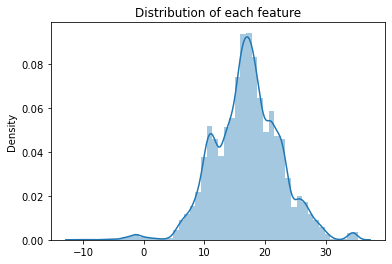

In [4]:
#check dataset distribution
sns.distplot(data).set(title='Distribution of each feature')

Why negative values ? Because data has already been log-normalized -> low intensities of a protein are negative.

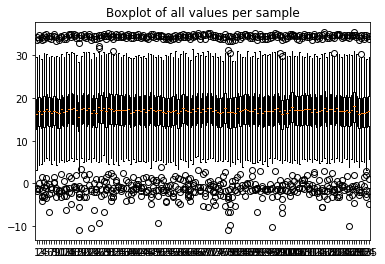

In [5]:
#plot each sample boxplot
plt.boxplot(data.transpose())
plt.title('Boxplot of all values per sample')
plt.show()

Distribution of dataset does not seem to be nicely normally distributed -> need to be normalized

## Normalization

In [6]:
#normally test function -> check if each column is normally distr
def norm_test(data):
    alpha = 1e-3
    k2, p = stats.normaltest(data)
    count=0
    for i in p:
        if i > alpha:  # null hypothesis: x comes from a normal distribution
            count+=1
    print('There are ',count,'normally distributed features out of',data.shape[1])
    
norm_test(data)

There are  240 normally distributed features out of 320


### Quantile Normalization

From other paper:\
One of the main goals performing normalization like Quantile normalization is to transform the raw data such that we can remove any unwanted variation due to technical artifacts and preserve the actual variation that we are interested in studying.

The quantile normalization (QN) procedure is simple: it involves first ranking the gene of each sample by magnitude, calculating the average value for genes occupying the same rank, and then substituting the values of all genes occupying that particular rank with this average value. The next step is to reorder the genes of each sample in their original order. This series of steps characterizes quantile normalization, and is the basic procedure underlying the various (sub)strategies

In [7]:
#QUANTILE NORMALIZATION
def quantile_normalize(df):
    #first rank each sample by magnitude
    df_sorted = pd.DataFrame(np.sort(df.values,axis=0),index=df.index,columns=df.columns)
    #compute average for genes in the same rank
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = np.arange(1, len(df_mean) + 1)
    #reorder the genes of each sample in their original order
    df_qn =df.rank(method="min").stack().astype(int).map(df_mean).unstack()
    return df_qn

# compute quantile normalized data
df_qn=quantile_normalize(data)
data = df_qn
norm_test(data)

There are  320 normally distributed features out of 320


C:\Users\marti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of each feature after normalization')]

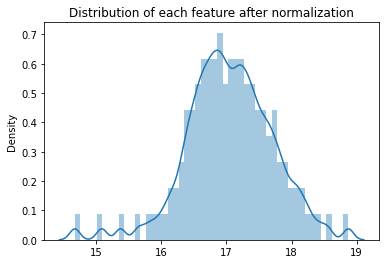

In [8]:
#check if data is better normally distributed
sns.distplot(data).set(title='Distribution of each feature after normalization')

## Split dataset

In [10]:
X = data

y_2 = df["binary_class"]
X_train_2_20, X_test_2_20, y_train_2_20, y_test_2_20 = train_test_split(X, y_2, test_size = 0.20, random_state = 97,stratify=y_2)
X_train_2_40, X_test_2_40, y_train_2_40, y_test_2_40 = train_test_split(X, y_2, test_size = 0.40, random_state = 97,stratify=y_2)

y_3 = df["three_class"]
X_train_3_20, X_test_3_20, y_train_3_20, y_test_3_20 = train_test_split(X, y_3, test_size = 0.20, random_state = 97,stratify=y_3)
X_train_3_40, X_test_3_40, y_train_3_40, y_test_3_40 = train_test_split(X, y_3, test_size = 0.40, random_state = 97,stratify=y_3)

### Is the data balanced ?

In [14]:
print("Binary: there are",len(y_2.loc[y_2==0]),"stable patients and",len(y_2.loc[y_2==1]),"decliner.")
print("Multi-class: there are",len(y_3.loc[y_3==0]),"slow decline, ",len(y_3.loc[y_3==1]),"fast decline and",len(y_3.loc[y_3==2]),"stable patients.")

Binary: there are 52 stable patients and 83 decliner.
Multi-class: there are 47 slow decline,  50 fast decline and 38 stable patients.


## Export dataset

In [15]:
#export to csv file
X_train_2_20.to_csv(r'dataset\X_train_2_20.csv')
X_test_2_20.to_csv(r'dataset\X_test_2_20.csv')
y_train_2_20.to_csv(r'dataset\y_train_2_20.csv')
y_test_2_20.to_csv(r'dataset\y_test_2_20.csv')

X_train_2_40.to_csv(r'dataset\X_train_2_40.csv')
X_test_2_40.to_csv(r'dataset\X_test_2_40.csv')
y_train_2_40.to_csv(r'dataset\y_train_2_40.csv')
y_test_2_40.to_csv(r'dataset\y_test_2_40.csv')

X_train_3_20.to_csv(r'dataset\X_train_3_20.csv')
X_test_3_20.to_csv(r'dataset\X_test_3_20.csv')
y_train_3_20.to_csv(r'dataset\y_train_3_20.csv')
y_test_3_20.to_csv(r'dataset\y_test_3_20.csv')

X_train_3_40.to_csv(r'dataset\X_train_3_40.csv')
X_test_3_40.to_csv(r'dataset\X_test_3_40.csv')
y_train_3_40.to_csv(r'dataset\y_train_3_40.csv')
y_test_3_40.to_csv(r'dataset\y_test_3_40.csv')